# Part I - Loan Data from Prosper
## by Adeleke Babatunde

## Introduction
> Introduce the dataset
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Gather and Assess the loan data

In [43]:
# Load the Loan Data from the URL
loan_df = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')

#Examine the first 5 rows
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [44]:
# Check for dataset information 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [45]:
# Check the shape of the data
loan_df.shape

(113937, 81)

> For the purpose of simplicity, I have selected the below columns from the list of features in the dataset

In [46]:
selected_col =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 
    'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'BorrowerAPR', 'IncomeRange',
    'BorrowerState','Occupation'
]

In [47]:
# Use the above list to filter the loan data
loan_df_copy = loan_df.copy()

#drop columns that are not needed
for col in loan_df_copy.columns:
    if col not in selected_col:
        del loan_df_copy[col]
        
loan_df_copy.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate
0,36,Completed,0.16516,0.1580,NaN,0,CO,Other,Self-employed,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00
1,36,Current,0.12016,0.0920,A,2,CO,Professional,Employed,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00
2,36,Completed,0.28269,0.2750,NaN,0,GA,Other,Not available,Not displayed,2083.333333,3001,2007-01-17 00:00:00
3,36,Current,0.12528,0.0974,A,16,GA,Skilled Labor,Employed,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00
4,36,Current,0.24614,0.2085,D,2,MN,Executive,Employed,"$100,000+",9583.333333,15000,2013-09-20 00:00:00


In [48]:
# Extracting Year in which Loan Originated
loan_df_copy['LoanOriginationYear'] = pd.DatetimeIndex(loan_df_copy['LoanOriginationDate']).year

In [49]:
loan_df_copy.isna().sum()

Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
IncomeRange                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationYear              0
dtype: int64

In [50]:
loan_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
LoanOriginationYear          113937 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 12.2+ MB


In [51]:
loan_df_copy.describe()

,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationYear
count,113937.000000,113912.000000,113937.000000,113937.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.218828,0.192764,2.774209,5.608026e+03,8337.01385,2011.042611
std,10.436212,0.080364,0.074818,3.996797,7.478497e+03,6245.80058,2.506634
min,12.000000,0.006530,0.000000,0.000000,0.000000e+00,1000.00000,2005.000000
25%,36.000000,0.156290,0.134000,1.000000,3.200333e+03,4000.00000,2008.000000
50%,36.000000,0.209760,0.184000,1.000000,4.666667e+03,6500.00000,2012.000000
75%,36.000000,0.283810,0.250000,3.000000,6.825000e+03,12000.00000,2013.000000
max,60.000000,0.512290,0.497500,20.000000,1.750003e+06,35000.00000,2014.000000


##### Clean the Data
The following were discovered in the analysis
1. Some columns have missing values
2. LoanOriginationDate has datatype Object
3. Some columns like ProsperRating (Alpha) and listingCategory (numeric) need renaming
4. The listing category need to be encoded based on information in the data dictionary
5. Regularize the loan status column to have only completed and defaulted as status

In [52]:
# Drop column with missing Prosper rating data
loan_df_copy.dropna(subset=['ProsperRating (Alpha)'], inplace=True)

In [53]:
# Change the datatype for LoanOriginationDate
loan_df_copy['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

In [54]:
# Rename columns
loan_df_copy.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)

In [55]:
# Encode the listing category
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_df_copy['ListingCategory'] = loan_df_copy['ListingCategory (numeric)'].map(list_dict)
loan_df_copy.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [56]:
# Let us regularize the Loan Status Column to only have Completed and Defaulted
condition = (loan_df_copy['LoanStatus'] == 'Completed') | (loan_df_copy['LoanStatus'] == 'Defaulted') |\
                  (loan_df_copy['LoanStatus'] == 'Chargedoff')
loan_df_copy = loan_df_copy[condition]

def regularize_loan_status(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

loan_df_copy['LoanStatus'] = loan_df_copy.apply(regularize_loan_status, axis=1)

In [57]:
#check the datatypes and ensure no missing value
loan_df_copy.info()
loan_df_copy.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26005 entries, 15 to 113935
Data columns (total 14 columns):
Term                   26005 non-null int64
LoanStatus             26005 non-null object
BorrowerAPR            26005 non-null float64
BorrowerRate           26005 non-null float64
ProsperRating          26005 non-null object
BorrowerState          26005 non-null object
Occupation             25992 non-null object
EmploymentStatus       26005 non-null object
IncomeRange            26005 non-null object
StatedMonthlyIncome    26005 non-null float64
LoanOriginalAmount     26005 non-null int64
LoanOriginationDate    26005 non-null datetime64[ns]
LoanOriginationYear    26005 non-null int64
ListingCategory        26005 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 3.0+ MB


(26005, 14)

In [58]:
# Check the Loan Status for regularization
loan_df_copy['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

> The original dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating, EmploymentStatus and many others) but it has been cleaned and the new structure contains 84,853 loans and 14 features

### What is/are the main feature(s) of interest in your dataset?

> I am particularly interested in features that affect the loan status especially defaults

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will support my investigation are LoanOriginalAmount, Term, BorrowerRate, ProsperRating, occupation, ListingCategory , StatedMonthlyIncome and EmploymentStatus

## Univariate Exploration

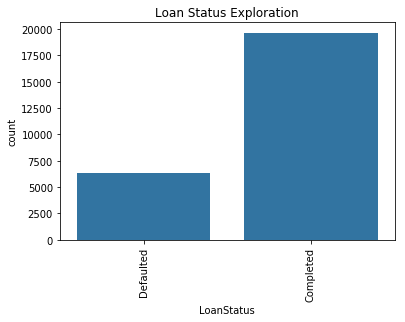

In [59]:
# Loan Status
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)
plt.title('Loan Status Exploration')
sb.countplot(data = loan_df_copy, x = 'LoanStatus', color = base_color);

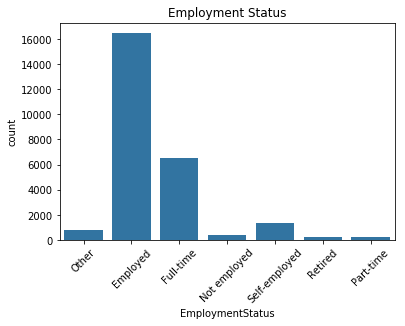

In [60]:
# Employment Status
base_color = sb.color_palette()[0]
plt.xticks(rotation=45)
plt.title('Employment Status')
sb.countplot(data = loan_df_copy, x = 'EmploymentStatus', color = base_color);

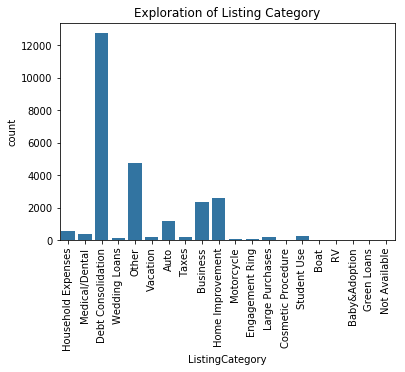

In [61]:
# Listing Category
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)
plt.title('Exploration of Listing Category')
sb.countplot(data = loan_df_copy, x = 'ListingCategory', color = base_color);

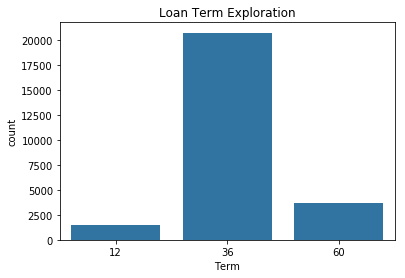

In [62]:
# Term
base_color = sb.color_palette()[0]

plt.title('Loan Term Exploration')
sb.countplot(data = loan_df_copy, x = 'Term', color = base_color);


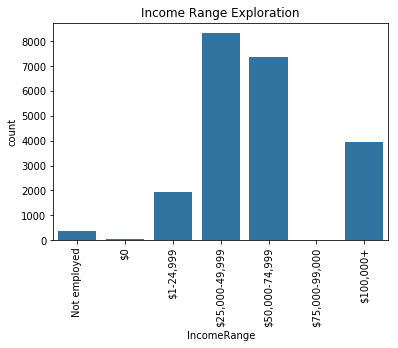

In [63]:
# Income Range Exploration
plt.title('Income Range Exploration')
plt.xticks(rotation=90)
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,000','$100,000+']
sb.countplot(data = loan_df_copy, x = 'IncomeRange', color = base_color, order=order);

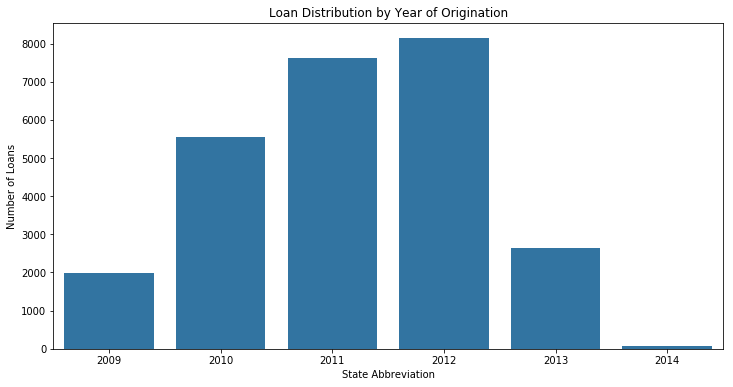

In [64]:
fig = plt.figure(figsize=(12,6))
sb.countplot(x='LoanOriginationYear', data=loan_df_copy, color = base_color)
plt.title('Loan Distribution by Year of Origination')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Loans')
plt.show()

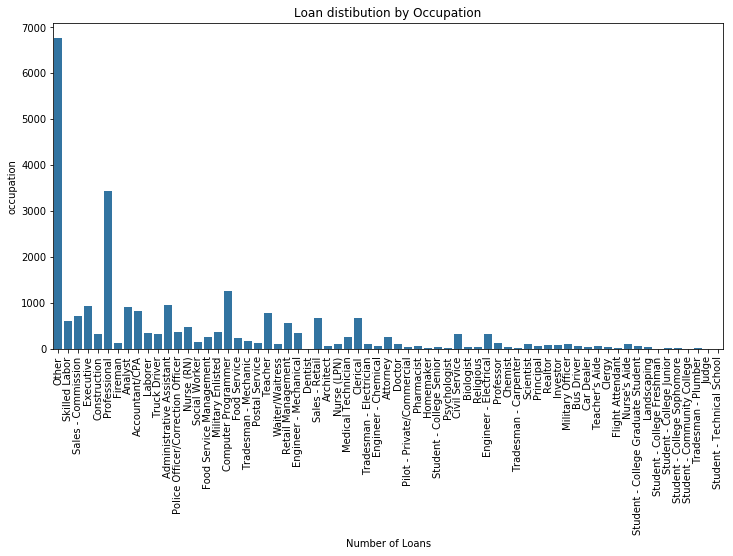

In [65]:
fig = plt.figure(figsize=(12,6))
sb.countplot(x='Occupation', data=loan_df_copy, color = base_color)
plt.title('Loan distibution by Occupation')
plt.xticks(rotation=90)
plt.xlabel('Number of Loans')
plt.ylabel('occupation')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I investigated the features LoanStatus, EmploymentStatus, StatedMonthlyIncome, Term and IncomeRange. Majority of the Loan have term of 36 months and are taken by people who are employed, more loans were given to people who have earnings between income range [25,000 - 74,999], surprisingly, people earning higher than this range seem to take lesser loan. Also I observed that majority of the loan originated in year 2013 and they have a loan status of current with few defaults

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the monthly stated Income, I had to do some transformations using the mean and standard deviation to get the boundary and adjusting the limit of the x axis of the plot so that I can get the actual distribution. Also, I extracted the year column from Loan origination date to do year on Year analysis and also did an encoding for the loan listing category to ensure proper visualization

## Bivariate Exploration

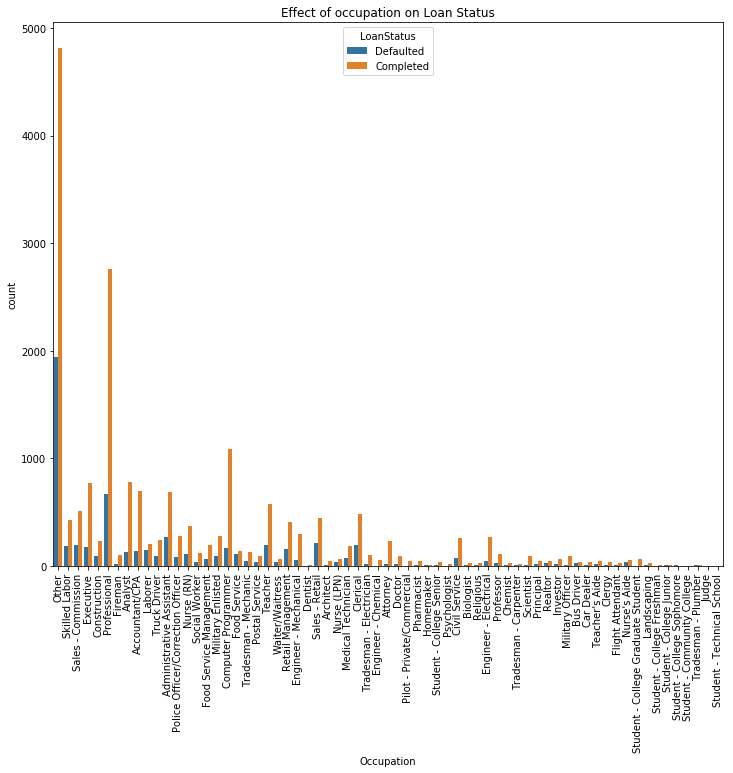

In [66]:
# Let us check how occupation relates to Loan Status
plt.figure(figsize = [12, 10])
plt.title('Effect of occupation on Loan Status')
plt.xticks(rotation=90)
sb.countplot(data = loan_df_copy, x = 'Occupation', hue = 'LoanStatus');

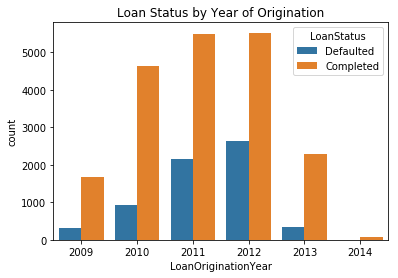

In [67]:
#Loan Status by Year of Origination
plt.title('Loan Status by Year of Origination')
sb.countplot(data = loan_df_copy, x = 'LoanOriginationYear', hue = 'LoanStatus');

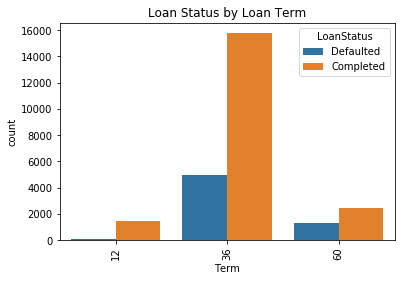

In [68]:
#Loan Status by Loan Term
plt.title('Loan Status by Loan Term')
plt.xticks(rotation=90)
sb.countplot(data = loan_df_copy, x = 'Term', hue = 'LoanStatus');

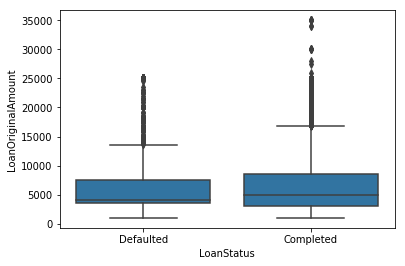

In [69]:
# Let us check the relationship between Loan status and Loan Amount
sb.boxplot(data = loan_df_copy, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);

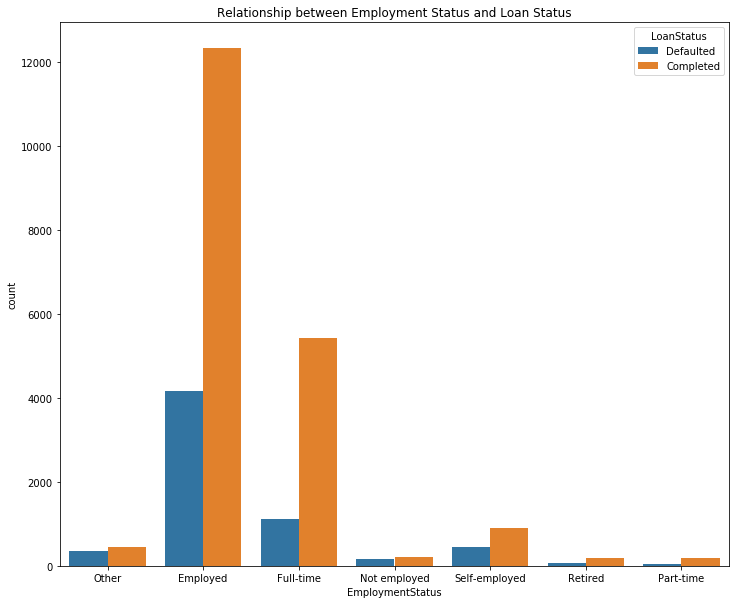

In [70]:
# Let us check the relationship between prosper rating and Employemnt status
plt.figure(figsize = [12, 10])
plt.title('Relationship between Employment Status and Loan Status')
sb.countplot(data = loan_df_copy, x = 'EmploymentStatus', hue = 'LoanStatus');

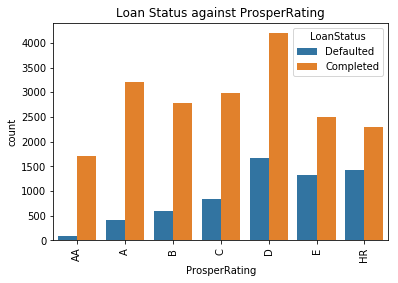

In [71]:
# Plot of Listing Category and Loan Status
plt.title('Loan Status against ProsperRating')
plt.xticks(rotation=90)
xorder = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.countplot(data = loan_df_copy, x = 'ProsperRating', hue = 'LoanStatus', order=xorder);

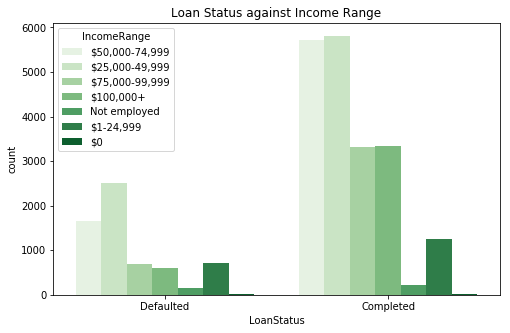

In [72]:
# Income Range and Loan Status
plt.figure(figsize = [8, 5])
plt.title('Loan Status against Income Range')
sb.countplot(data = loan_df_copy.query("LoanStatus in ('Defaulted','Completed')"), x = 'LoanStatus', hue = 'IncomeRange', palette='Greens');

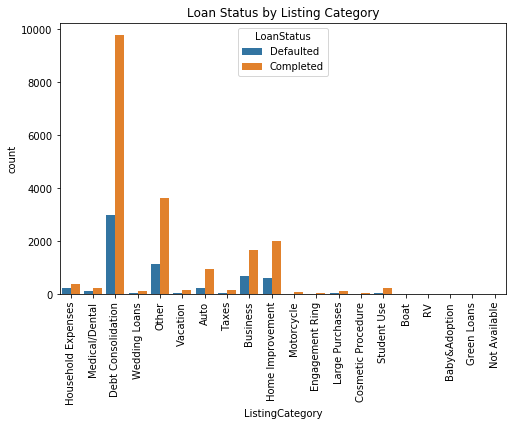

In [73]:
# Loan Listing by Listing Category
plt.figure(figsize = [8, 5])
plt.title('Loan Status by Listing Category')
plt.xticks(rotation=90)
sb.countplot(data = loan_df_copy, x = 'ListingCategory', hue = 'LoanStatus');

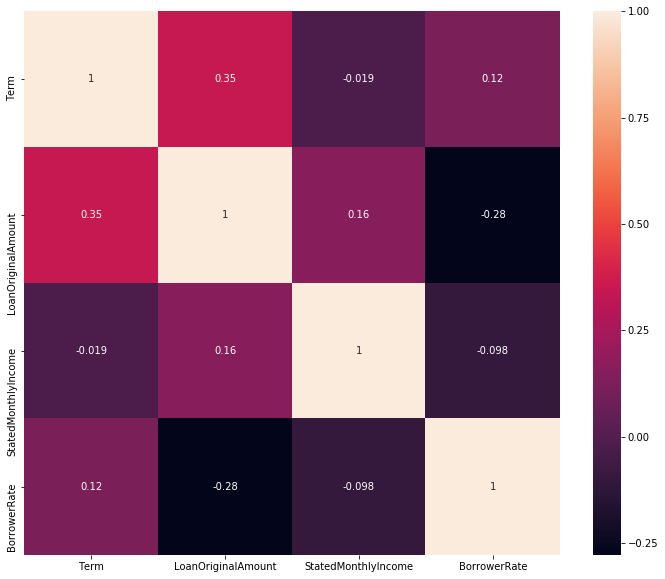

In [74]:
# Let us plot a heatmap of the data set to see the correlation
plt.figure(figsize = [12, 10])
sb.heatmap(loan_df_copy[['Term','LoanOriginalAmount','StatedMonthlyIncome','BorrowerRate']].corr(), annot=True);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The majority of people who defaulted in paying their loan are employed in a full-time job and Most of the defaulters are within the income range [25,000 - 49,999]. My investigation further shows that people with debt consolidation as reason tends to default more on loan and the majority of loans fall under the prosper rating D category. Majority of the Loan default have Loan amount between 4000 and 8000

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a positive correlation between Loan Original Amount and Monthly stated Income and also between Loan Original Amount and Loan Term. However, there is a slightly negative correlation between StatedMonthlyIncomea and Term

## Multivariate Exploration

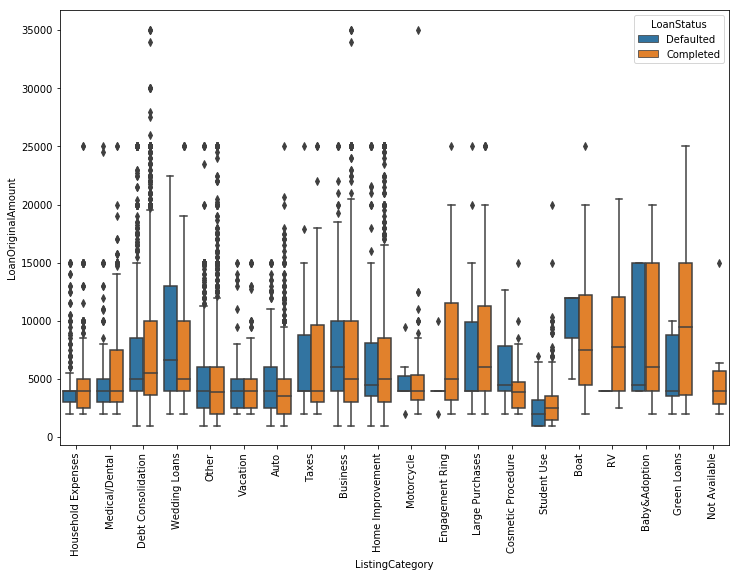

In [75]:
# Exploring Original Loan Amount, Listing Category and Loan Status
plt.figure(figsize = [12, 8])
plt.xticks(rotation=90)
sb.boxplot(data=loan_df_copy, x='ListingCategory', y='LoanOriginalAmount', hue='LoanStatus');

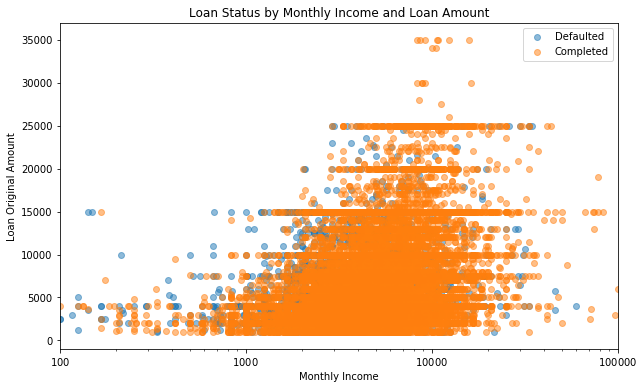

In [82]:
# Exploring Original Loan Amount, Stated Monthly Income and Loan Status
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Defaulted':'steelblue','Completed':'orange'}
#plt.figure(figsize = [12, 8])
plt.title('Loan Status by Monthly Income and Loan Amount')
plt.xscale('log')
plt.xlabel('Monthly Income')
plt.ylabel('Loan Original Amount')
plt.xlim(100,100000)
xticks = [100,1000,10000,100000]
ax.set_xticks(xticks)
ax.set_xticklabels(["$%.0f$" % x for x in xticks], fontsize=10)
plt.scatter(data=loan_df_copy.query("LoanStatus == 'Defaulted'"), x='StatedMonthlyIncome', y='LoanOriginalAmount', alpha=1/2)
plt.scatter(data=loan_df_copy.query("LoanStatus == 'Completed'"), x='StatedMonthlyIncome', y='LoanOriginalAmount', alpha=1/2)

# Add legend
plt.legend(["Defaulted" , "Completed"], loc= 'upper right');

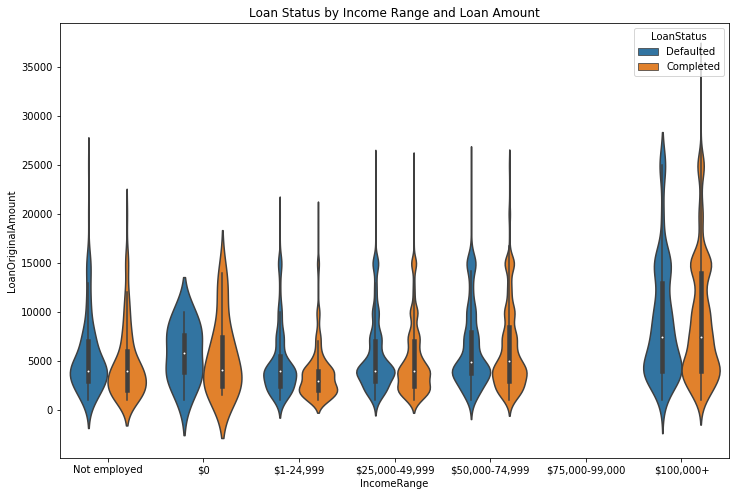

In [80]:
plt.figure(figsize = [12, 8])
plt.title('Loan Status by Income Range and Loan Amount')
sb.violinplot(data=loan_df_copy, x='IncomeRange', y='LoanOriginalAmount', hue='LoanStatus', order = order);

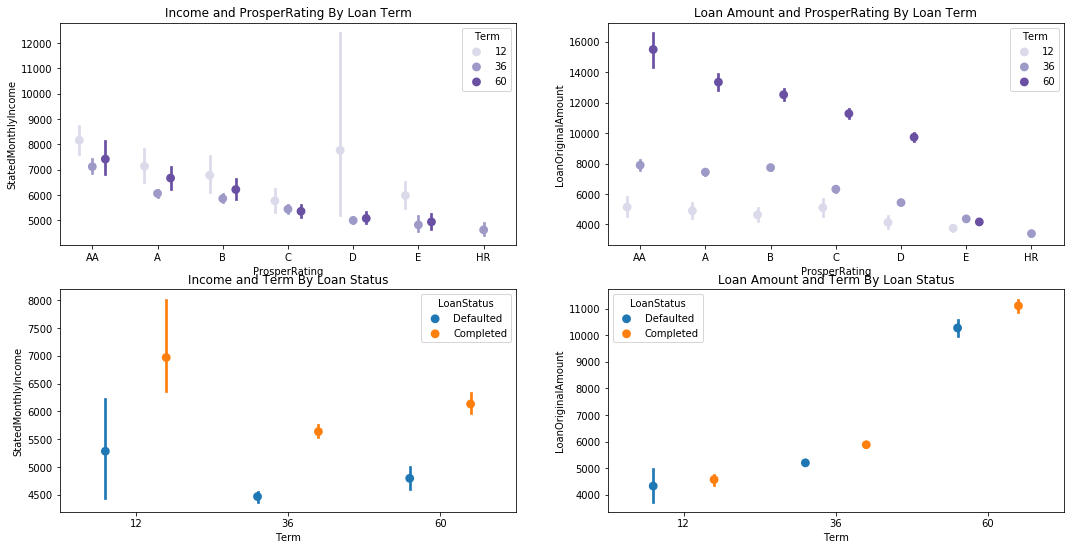

In [81]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=[18,9])
sb.pointplot(data = loan_df_copy, x = 'ProsperRating', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, order=xorder, ax=ax[0,0]).set(title='Income and ProsperRating By Loan Term')
sb.pointplot(data = loan_df_copy, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4,order=xorder, ax=ax[0,1]).set(title='Loan Amount and ProsperRating By Loan Term')
sb.pointplot(data = loan_df_copy, x = 'Term', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
           linestyles = '', dodge = 0.4, ax=ax[1,0]).set(title='Income and Term By Loan Status')
sb.pointplot(data = loan_df_copy, x = 'Term', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           linestyles = '', dodge = 0.4, ax=ax[1,1]).set(title='Loan Amount and Term By Loan Status');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> ListingCategories Debt Consolidation, Wedding Loans, Baby&Adoption, Business and Home Improvement have Loan Amount with higher ranges of default. Also Income range from 25K to 100K have the highest loan ranges with defaults. Persons with Loan Rating AA and A usually take loans with higher term, persons with Loan Rating D go for short term loans. Lower loan amount between 4k to 5k over a 12 month term tend to default more 

### Were there any interesting or surprising interactions between features?

> Yes, Majority of Loans with Term of 12 months have lower Loans category and less defaults. Another surprising interaction is that most loans with defaults are from employed persons, those with no earnings (0 dollars and not employed) seem to complete their loans. Loans with higher amount over a 60 month term seem to complete but default when the term is shorter even for persons in higher Income Range. Also the number of defaulted loans have reduced after it peaked in the year 2013 most like because the company reduced the number of loans after 2013

## Conclusions
> The exploration is all about Loan status and what factors can affect the loan status. The following features have been observed to have effect on the loan status
>1. Employment Status
>2. Income Range
>3. Term
>4. BorrowerRate
>5. ListingCategory
>6. ProsperRating

> Most Loans are given to employed persons, but it has been observed through this analysis that most persons within the income range [25,000 to 49,999] seem to default more on their loans, for this kind of persons, it has been observed that when the listing category is for wedding and Baby&Adoption, the default rate is high, the company might need to take this into consideration for other persons requesting for loans.
Also, the higher the BorrowerRate, the higher the probabily that the persons will default, hence, due dilligence needs to be carried out to know if the ProsperRating is HR, D and E which seem to be the ProsperRating with more Defaults



In [41]:
#Save the wrangled data to the workspace to be used in the slides notebook
loan_df_copy.to_csv('Loan_data_cleaned.csv')